# Importing Mesh

In [1]:
import fenics as fn
import numpy as np
import matplotlib.pyplot as plt
from mshr import *
import pandas as pd
%matplotlib widget

# Define the .xml file path
xml_mesh_file = "../Mesh Geometry/Rooney Paper Ed3/Rooney3D.xml"

# Create a Mesh object and read the mesh from the .xml file
mesh = fn.Mesh(xml_mesh_file)

In [2]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [3]:
# Read subdomains and boundaries
subdomains =  fn.MeshFunction("size_t", mesh,'../Mesh Geometry/Rooney Paper Ed3/Rooney3D_physical_region.xml')
boundaries = fn.MeshFunction('size_t', mesh,'../Mesh Geometry/Rooney Paper Ed3/Rooney3D_facet_region.xml')

# Define Material Parameters

In [4]:
# Define function space of 0th degree to contain the material specific paramters
V0 = fn.FunctionSpace(mesh, 'DG', 0)

In [5]:
class Lambda(fn.UserExpression):
    # Define initializer method, it will be called when an instance of this class is created
    def __init__(self, markers, **kwargs):
        # Our boundary identifier data will be passed to "markers"
        self.markers = markers
        super().__init__(**kwargs)
        
    def eval_cell(self, values, x, cell):
        # Ge (index = 298) Lambda = 49
        if self.markers[cell.index] == 298:
            values[0] = 49.0
        # Al2O3 (index = 296) Lambda = 63.3
        elif self.markers[cell.index] == 296:
            values[0] = 63.3
        # Al (index = 295) Lambda = 61.37
        elif self.markers[cell.index] == 295:
            values[0] = 61.37
        # GeSi (index = 297) Lambda = 52.2
        elif self.markers[cell.index] == 297:
            values[0] = 52.2
        # There shouldn't any more physical regions, in case we make mistake in geometry, we let their Lambda be 0
        else:
            values[0] = 0

In [6]:
# Create a Lambda class object that represents the first Lame parameter of each region
lam = Lambda(subdomains, degree=0)

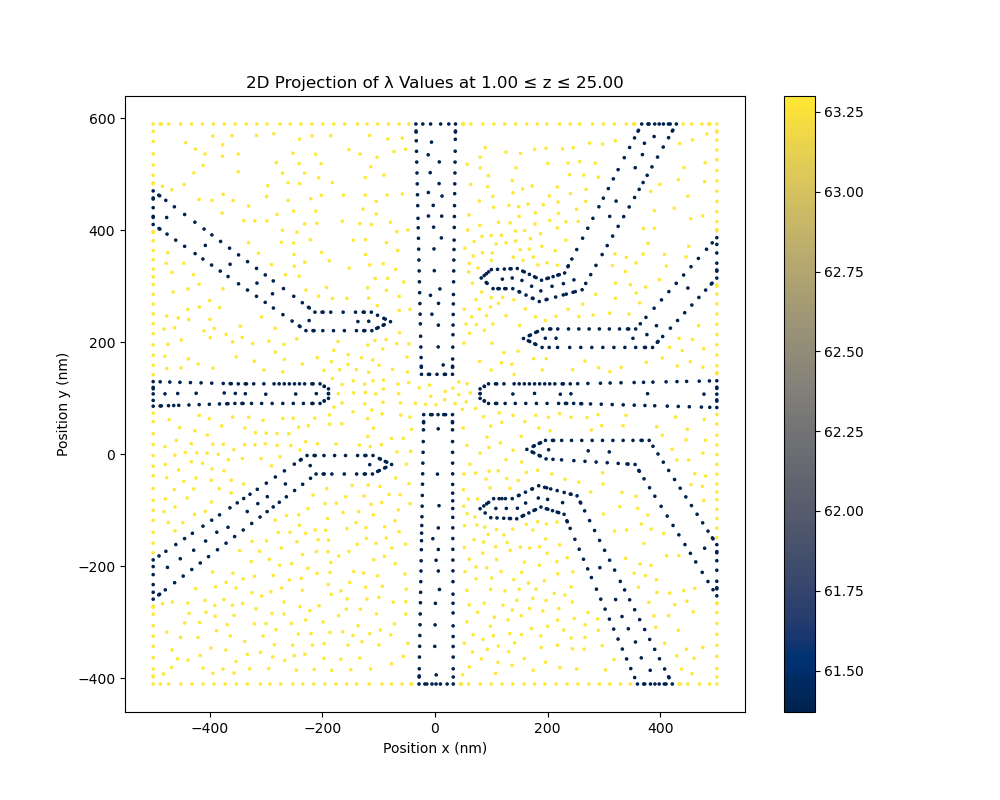

In [7]:
# Project the lambda function onto the function space if needed
lam_projected = fn.project(lam, V0)

# Define the z-range for filtering
z_min, z_max = 1, 25 # Adjust these values to your specific range

# Get all mesh coordinates and corresponding vertex values
coords = mesh.coordinates()
values = lam_projected.compute_vertex_values()

# Filter vertices within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_values = values[z_filter]

# Extract only x and y coordinates for the plot
x, y = filtered_coords[:, 0], filtered_coords[:, 1]

# Step 4: Plot the results using a scatter plot
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(x, y, c=filtered_values, cmap='cividis', marker='.', s=10)  # s is the size of each point
plt.colorbar(scatter_plot)
plt.title('2D Projection of λ Values at {:.2f} ≤ z ≤ {:.2f}'.format(z_min, z_max))
plt.xlabel('Position x (nm)')
plt.ylabel('Position y (nm)')
plt.show()

In [8]:
class Mu(fn.UserExpression):
    # Define initializer method, it will be called when an instance of this class is created
    def __init__(self, markers, **kwargs):
        # Our boundary identifier data will be passed to "markers"
        self.markers = markers
        super().__init__(**kwargs)
        
    def eval_cell(self, values, x, cell):
        # Ge (index = 298) Mu = 68.8
        if self.markers[cell.index] == 298:
            values[0] = 68.8
        # Al2O3 (index = 296) Mu = 68.5
        elif self.markers[cell.index] == 296:
            values[0] = 68.5
        # Al (index = 295) Mu = 30.9
        elif self.markers[cell.index] == 295:
            values[0] = 30.9
        # GeSi (index = 297) Mu = 71.1
        elif self.markers[cell.index] == 297:
            values[0] = 71.1
        # There shouldn't any more physical regions, in case we make mistake in geometry, we let their Lambda be 0
        else:
            values[0] = 0

In [9]:
# Create a Mu class object that represents the second Lame parameter of each region
mu = Mu(subdomains, degree=0)

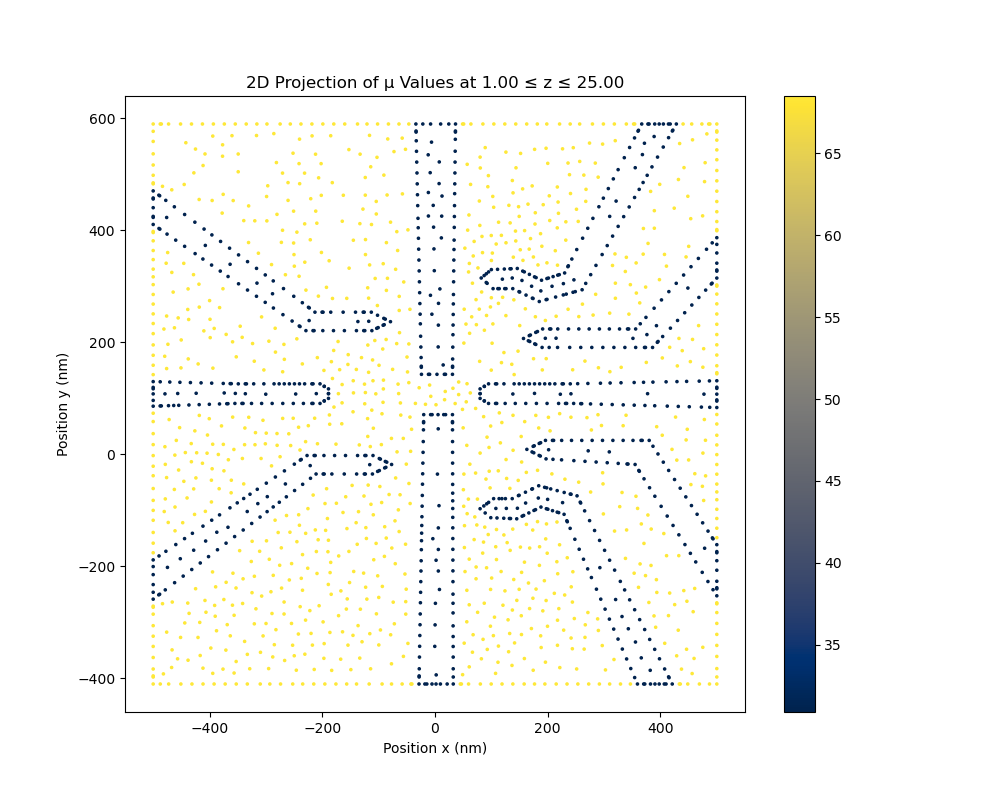

In [10]:
# Project the lambda function onto the function space if needed
mu_projected = fn.project(mu, V0)

# Define the z-range for filtering
z_min, z_max = 1, 25 # Adjust these values to your specific range

# Get all mesh coordinates and corresponding vertex values
coords = mesh.coordinates()
values = mu_projected.compute_vertex_values()

# Filter vertices within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_values = values[z_filter]

# Extract only x and y coordinates for the plot
x, y = filtered_coords[:, 0], filtered_coords[:, 1]

# Step 4: Plot the results using a scatter plot
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(x, y, c=filtered_values, cmap='cividis', marker='.', s=10)  # s is the size of each point
plt.colorbar(scatter_plot)
plt.title('2D Projection of μ Values at {:.2f} ≤ z ≤ {:.2f}'.format(z_min, z_max))
plt.xlabel('Position x (nm)')
plt.ylabel('Position y (nm)')
plt.show()

In [11]:
class Alpha(fn.UserExpression):
    # Define initializer method, it will be called when an instance of this class is created
    def __init__(self, markers, **kwargs):
        # Our boundary identifier data will be passed to "markers"
        self.markers = markers
        super().__init__(**kwargs)
        
    def eval_cell(self, values, x, cell):
        # Ge (index = 270) alpha = 6.64
        if self.markers[cell.index] == 298:
            values[0] = 2.4 * 10**(-6)
        # Al2O3 (index = 272) alpha = 4.2
        elif self.markers[cell.index] == 296:
            values[0] = 0.8 * 10**(-6)
        # Al (index = 271) alpha = 24
        elif self.markers[cell.index] == 295:
            values[0] = 0.38 * 10**(-6)
        # GeSi (index = 269) alpha = 4.64
        elif self.markers[cell.index] == 297:
            values[0] = 4.7 * 10**(-6)
        # There shouldn't any more physical regions, in case we make mistake in geometry, we let their Lambda be 0
        else:
            values[0] = 0

In [12]:
# Create an Alpha class object that represents the linear thermal expansion coefficient of each region
alpha = Alpha(subdomains, degree=0)

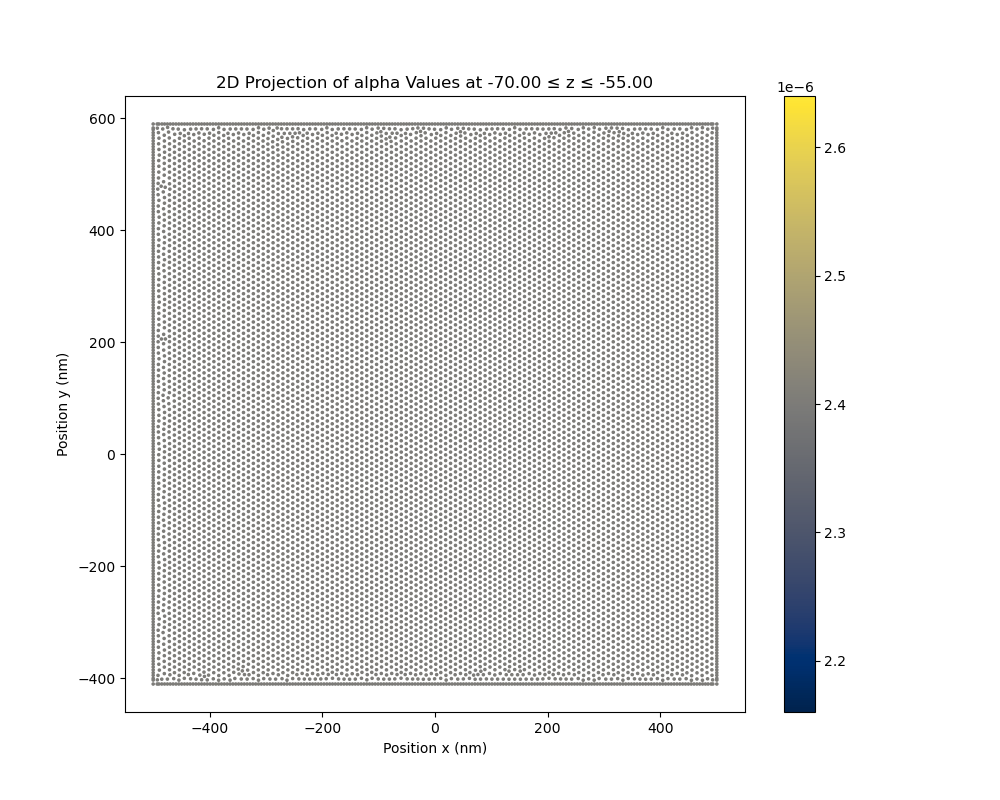

In [13]:
# Project the lambda function onto the function space if needed
alpha_projected = fn.project(alpha, V0)

# Define the z-range for filtering
z_min, z_max = -70, -55 # Adjust these values to your specific range

# Get all mesh coordinates and corresponding vertex values
coords = mesh.coordinates()
values = alpha_projected.compute_vertex_values()

# Filter vertices within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_values = values[z_filter]

# Extract only x and y coordinates for the plot
x, y = filtered_coords[:, 0], filtered_coords[:, 1]

# Step 4: Plot the results using a scatter plot
plt.figure(figsize=(10, 8))
scatter_plot = plt.scatter(x, y, c=filtered_values, cmap='cividis', marker='.', s=10)  # s is the size of each point
plt.colorbar(scatter_plot)
plt.title('2D Projection of alpha Values at {:.2f} ≤ z ≤ {:.2f}'.format(z_min, z_max))
plt.xlabel('Position x (nm)')
plt.ylabel('Position y (nm)')
plt.show()

# Solve Thermal Equilibrium Problem

In [14]:
# Define function space for temperature on the mesh
VT = fn.FunctionSpace(mesh, "CG", 1)

# Define test and trial functions for the variational formulation
T_ = fn.TestFunction(VT)
dT = fn.TrialFunction(VT)

# Function to hold the computed temperature increase
Delta_T = fn.Function(VT, name="Temperature increase")

# Define the weak form of the heat equation
# Assuming steady-state heat conduction with no internal heat generation
aT = fn.dot(fn.grad(dT), fn.grad(T_)) * fn.dx  # Bilinear form
LT = fn.Constant(0) * T_ * fn.dx  # Linear form representing zero source terms

In [15]:
# Boundary condition: Temperature set to 300K at the outermost boundary
# The '100' identifies the part of the boundary to apply this condition
T_BC1 = fn.DirichletBC(VT, fn.Constant(280), boundaries, 299)
T_BC2 = fn.DirichletBC(VT, fn.Constant(280), boundaries, 300)

# List of boundary conditions
T_BCs = [T_BC1, T_BC2]

In [16]:
# Solve the thermal problem
fn.solve(aT == LT, Delta_T, T_BCs, solver_parameters = {
    'linear_solver': 'gmres',
    'preconditioner': 'hypre_amg'
})

Solving linear variational problem.


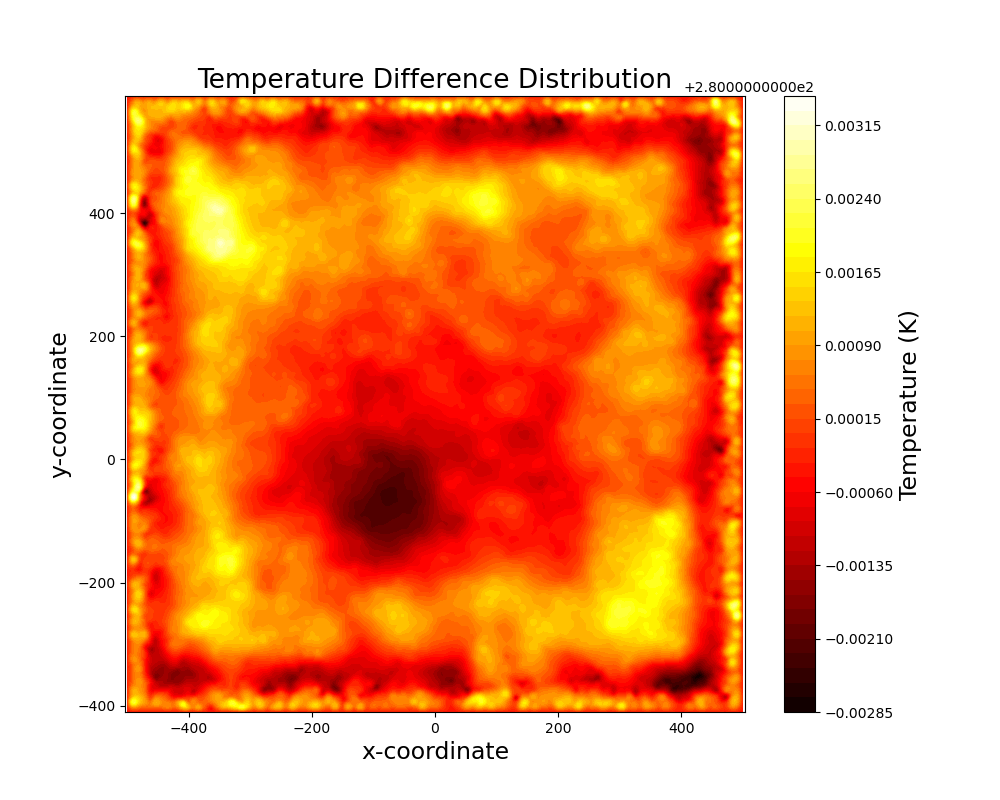

In [23]:
from scipy.interpolate import griddata
# Define the z-range
z_min = -65
z_max = -50

# Extract mesh coordinates and temperature values
coords = mesh.coordinates()
values = Delta_T.compute_vertex_values(mesh)  # Ensure to pass mesh if needed

# Filter the vertices within the z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_values = values[z_filter]

# Check if there are enough points for meaningful interpolation
if len(filtered_values) > 0:
    # Create grid for interpolation
    x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
    y_lin = np.linspace(filtered_coords[:, 1].min(), filtered_coords[:, 1].max(), 500)
    X, Y = np.meshgrid(x_lin, y_lin)

    # Interpolate scattered data to the grid
    Z = griddata((filtered_coords[:, 0], filtered_coords[:, 1]), filtered_values, (X, Y), method='cubic')

    # Plot the interpolated temperature values
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, levels=50, cmap='hot')
    cbar = plt.colorbar(contour, label='Temperature (K)')
    cbar.ax.set_ylabel('Temperature (K)', fontsize=17)  # Set colorbar label size
    plt.title('Temperature Difference Distribution', fontsize=19)
    plt.xlabel('x-coordinate', fontsize=17)
    plt.ylabel('y-coordinate', fontsize=17)
    plt.axis('equal')
    plt.show()
    # Set the tick label size
    plt.xticks(fontsize=14)  # Set the size of numbers on the x-axis
    plt.yticks(fontsize=14)  # Set the size of numbers on the y-axis
else:
    print("Not enough points within the specified z-range for interpolation. Try adjusting the range.")


# Solve Strain Problem

In [24]:
def eps(v):
    """ Compute the symmetric gradient (strain tensor) in 3D. """
    return fn.sym(fn.grad(v))

def sigma(v, dT):
    """
    Compute the stress tensor in 3D, directly using FEniCS mesh functions for 
    material properties and thermal effects.
    
    Args:
    - v: displacement field (Function)
    - dT: temperature change field (Function)
    
    Returns:
    - Stress tensor as a FEniCS TensorFunction
    """
    # Assume 'lam', 'mu', 'alpha' are defined globally or are accessible from the mesh
    # Compute the identity tensor in 3D
    I = fn.Identity(3)  # Appropriate for 3D problems

    # Thermal expansion term, computed with direct access to parameters
    thermal_expansion = alpha * (3 * lam + 2 * mu) * dT

    # Compute the full stress tensor incorporating both mechanical and thermal effects
    return (lam * fn.tr(eps(v)) - thermal_expansion) * I + 2.0 * mu * eps(v)

In [25]:
# Create a vector function space on the mesh for displacement field
Vu = fn.VectorFunctionSpace(mesh, 'CG', 2)

# Define trial and test functions for the variational formulation
du = fn.TrialFunction(Vu)
u_ = fn.TestFunction(Vu)

# Define the source term as zero (no external forces)
f = fn.Constant((0, 0, 0))

# Formulate the weak form of the internal energy (bilinear and linear forms)
Wint = fn.inner(sigma(du, Delta_T), eps(u_)) * fn.dx
aM = fn.lhs(Wint)  # Bilinear form
LM = fn.rhs(Wint) + fn.inner(f, u_) * fn.dx  # Linear form including external forces

In [26]:
# Apply Dirichlet boundary conditions (fixed displacement at outmost boundaries)
U_BC1 = fn.DirichletBC(Vu, fn.Constant((0., 0., 0.)), boundaries, 299) # Base
U_BC2 = fn.DirichletBC(Vu, fn.Constant((0., 0., 0.)), boundaries, 300) # Top

# List of boundary conditions
U_BCs = [U_BC1, U_BC2]

In [27]:
# Solve the strain problem
u = fn.Function(Vu, name="Displacement")
fn.solve(aM == LM, u, U_BCs, solver_parameters = {
    'linear_solver': 'gmres',
    'preconditioner': 'hypre_amg'
})

Solving linear variational problem.


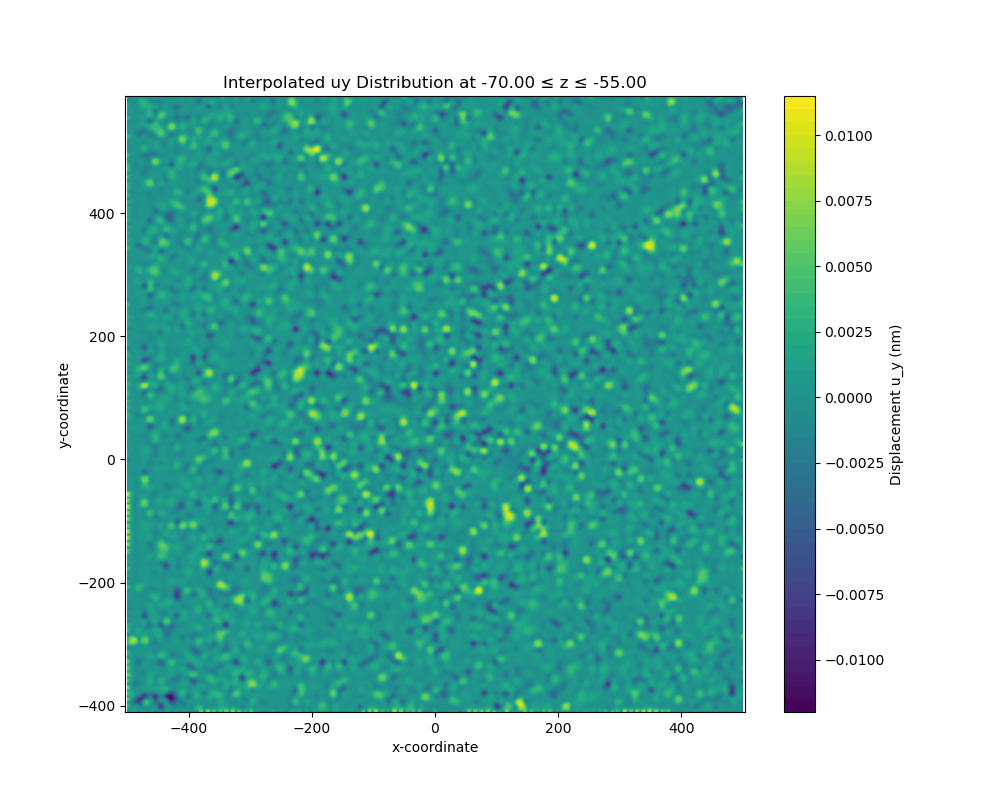

In [29]:
# Define the z-range for the slice
z_min, z_max = -70, -55  # Adjust these values as needed

# Extract mesh coordinates and displacement values
coords = mesh.coordinates()
u_values = u.compute_vertex_values(mesh)

# Reshape u_values to have the correct shape (n, 3) where '3' is the number of components
u_values = u_values.reshape((-1, 3))  # Adjust the '3' if your vector field dimension differs

# Filter the vertices and u_values within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_u_values = u_values[z_filter, 1]  # Selecting only the second component (uy)

# Create grid for interpolation
x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
y_lin = np.linspace(filtered_coords[:, 1].min(), filtered_coords[:, 1].max(), 500)
X, Y = np.meshgrid(x_lin, y_lin)

# Interpolate scattered data to the grid
Uy = griddata((filtered_coords[:, 0], filtered_coords[:, 1]), filtered_u_values, (X, Y), method='cubic')

# Plot the interpolated uy values
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Uy, levels=50, cmap='viridis')
plt.colorbar(contour, label='Displacement u_y (nm)')
plt.title('Interpolated uy Distribution at {:.2f} ≤ z ≤ {:.2f}'.format(z_min, z_max))
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.axis('equal')
plt.show()

In [23]:
# Calculate strain tensor
# Assuming 'u' is your solution displacement field
strain_tensor = eps(u)

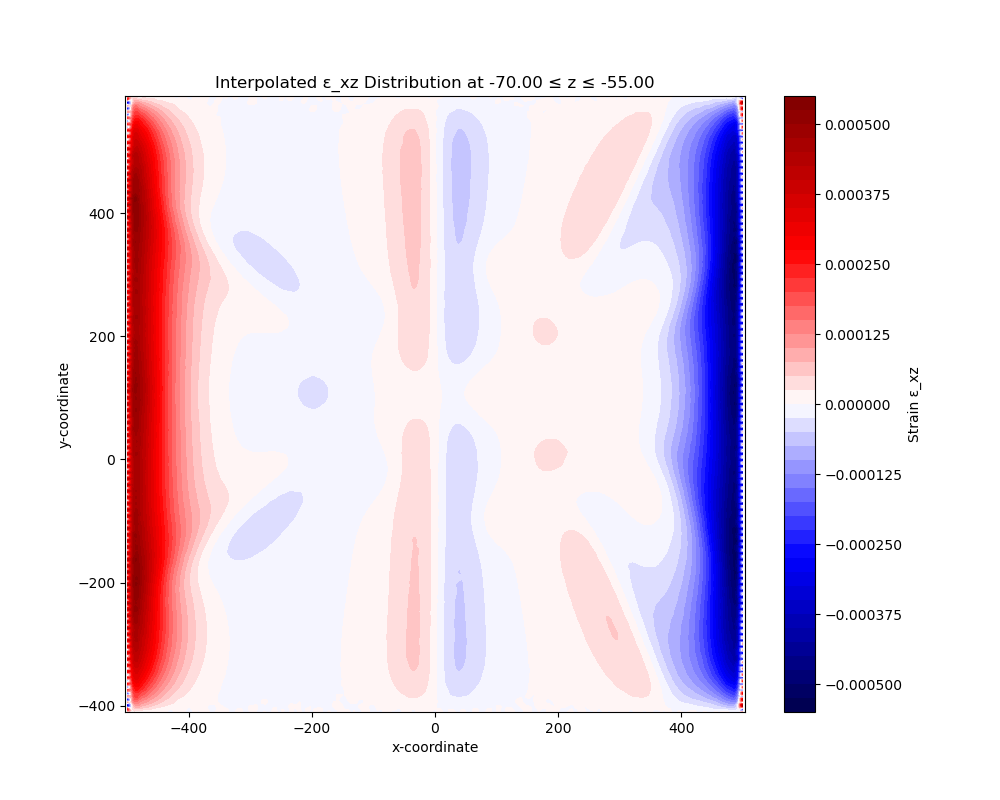

In [24]:
# Create a scalar function space for the strain component
V_scalar = fn.FunctionSpace(mesh, 'P', 1)  # 'P' for scalar field projection

# Project the xz-component of the strain tensor for visualization
epsilon_xz = fn.project(strain_tensor[0, 2], V_scalar)  # Corrected function space

# Define the z-range for the slice
z_min, z_max = -70, -55  # Adjust these values as needed

# Extract mesh coordinates and epsilon_xz values
coords = mesh.coordinates()
epsilon_values = epsilon_xz.compute_vertex_values(mesh)  # Already scalar values, no need for reshaping

# Filter the vertices and epsilon_values within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_epsilon_values = epsilon_values[z_filter]

# Create grid for interpolation
x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
y_lin = np.linspace(filtered_coords[:, 1].min(), filtered_coords[:, 1].max(), 500)
X, Y = np.meshgrid(x_lin, y_lin)

# Interpolate scattered data to the grid
epsilon_component = griddata((filtered_coords[:, 0], filtered_coords
[:, 1]), filtered_epsilon_values, (X, Y), method='cubic')

# Plot the interpolated ε_xx values
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, epsilon_component, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain ε_xz')
plt.title(f'Interpolated ε_xz Distribution at {z_min:.2f} ≤ z ≤ {z_max:.2f}')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.axis('equal')
plt.show()

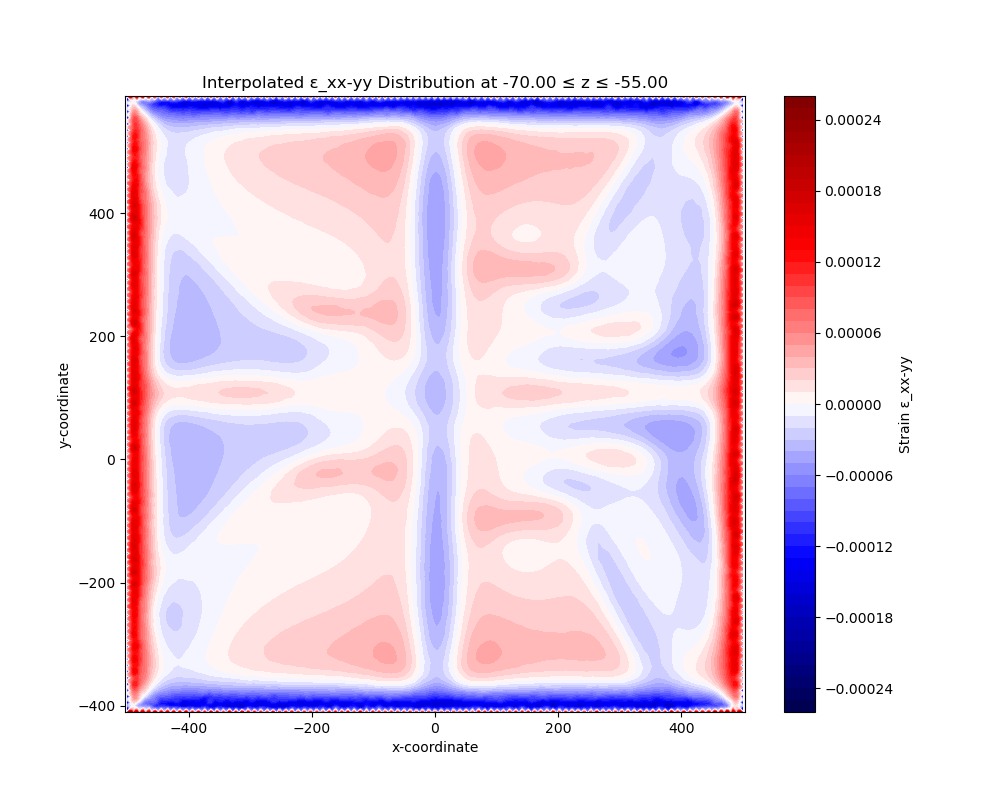

In [25]:
# Create a scalar function space for the strain component
V_scalar = fn.FunctionSpace(mesh, 'P', 1)  # 'P' for scalar field projection

# Project the yy-component of the strain tensor for visualization
strain_xx_m_yy = strain_tensor[0, 0] - strain_tensor[1, 1]
epsilon_xx_m_yy = fn.project(strain_xx_m_yy, V_scalar)  # Corrected function space

# Define the z-range for the slice
z_min, z_max = -70, -55  # Adjust these values as needed

# Extract mesh coordinates and epsilon_yy values
coords = mesh.coordinates()
epsilon_values = epsilon_xx_m_yy.compute_vertex_values(mesh)  # Already scalar values, no need for reshaping

# Filter the vertices and epsilon_values within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_epsilon_values = epsilon_values[z_filter]

# Create grid for interpolation
x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
y_lin = np.linspace(filtered_coords[:, 1].min(), filtered_coords[:, 1].max(), 500)
X, Y = np.meshgrid(x_lin, y_lin)

# Interpolate scattered data to the grid
epsilon_component = griddata((filtered_coords[:, 0], filtered_coords[:, 1]), filtered_epsilon_values, (X, Y), method='cubic')

# Plot the interpolated ε_yy values
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, epsilon_component, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain ε_xx-yy')
plt.title(f'Interpolated ε_xx-yy Distribution at {z_min:.2f} ≤ z ≤ {z_max:.2f}')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.axis('equal')
plt.show()

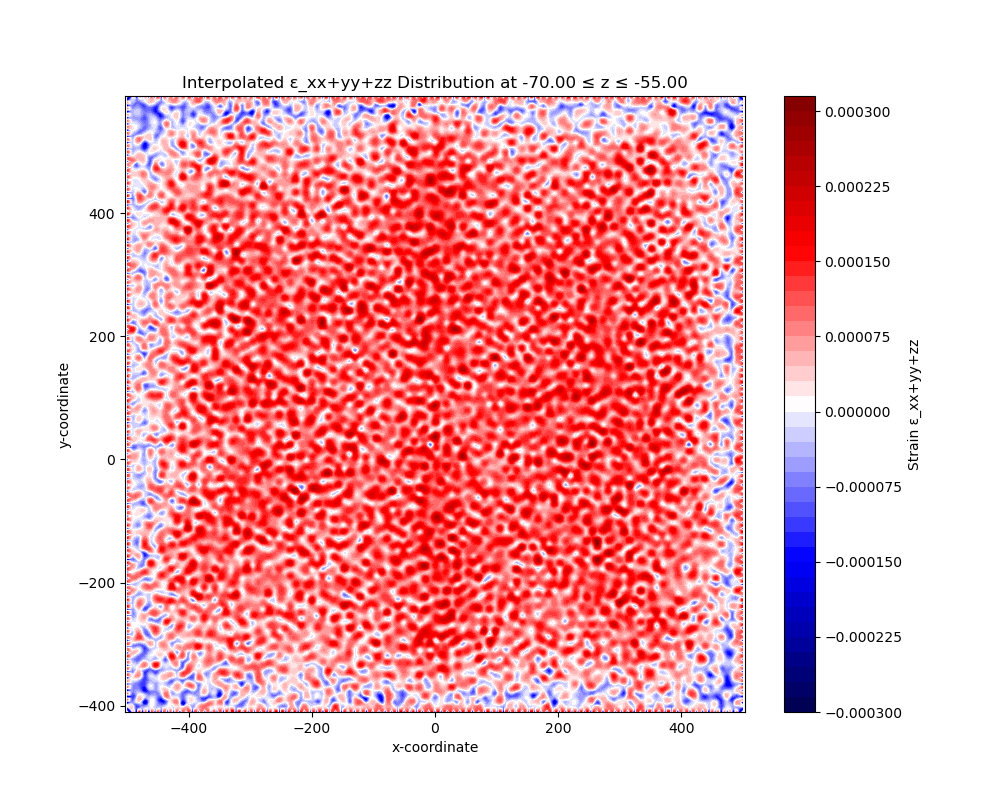

In [26]:
# Create a scalar function space for the strain component
V_scalar = fn.FunctionSpace(mesh, 'P', 1)  # 'P' for scalar field projection

# Project the xx+yy+zz-component of the strain tensor for visualization
strain_xxyyzz = strain_tensor[0, 0] + strain_tensor[1, 1] + strain_tensor[2, 2]
epsilon_xxyyzz = fn.project(strain_xxyyzz, V_scalar)  # Corrected function space

# Define the z-range for the slice
z_min, z_max = -70, -55  # Adjust these values as needed

# Extract mesh coordinates and epsilon_xy values
coords = mesh.coordinates()
epsilon_values = epsilon_xxyyzz.compute_vertex_values(mesh)  # Already scalar values, no need for reshaping

# Filter the vertices and epsilon_values within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_epsilon_values = epsilon_values[z_filter]

# Create grid for interpolation
x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
y_lin = np.linspace(filtered_coords[:, 1].min(), filtered_coords[:, 1].max(), 500)
X, Y = np.meshgrid(x_lin, y_lin)

# Interpolate scattered data to the grid
epsilon_component = griddata((filtered_coords[:, 0], filtered_coords[:, 1]), filtered_epsilon_values, (X, Y), method='cubic')

# Plot the interpolated ε_xy values
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, epsilon_component, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain ε_xx+yy+zz')
plt.title(f'Interpolated ε_xx+yy+zz Distribution at {z_min:.2f} ≤ z ≤ {z_max:.2f}')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.axis('equal')
plt.show()

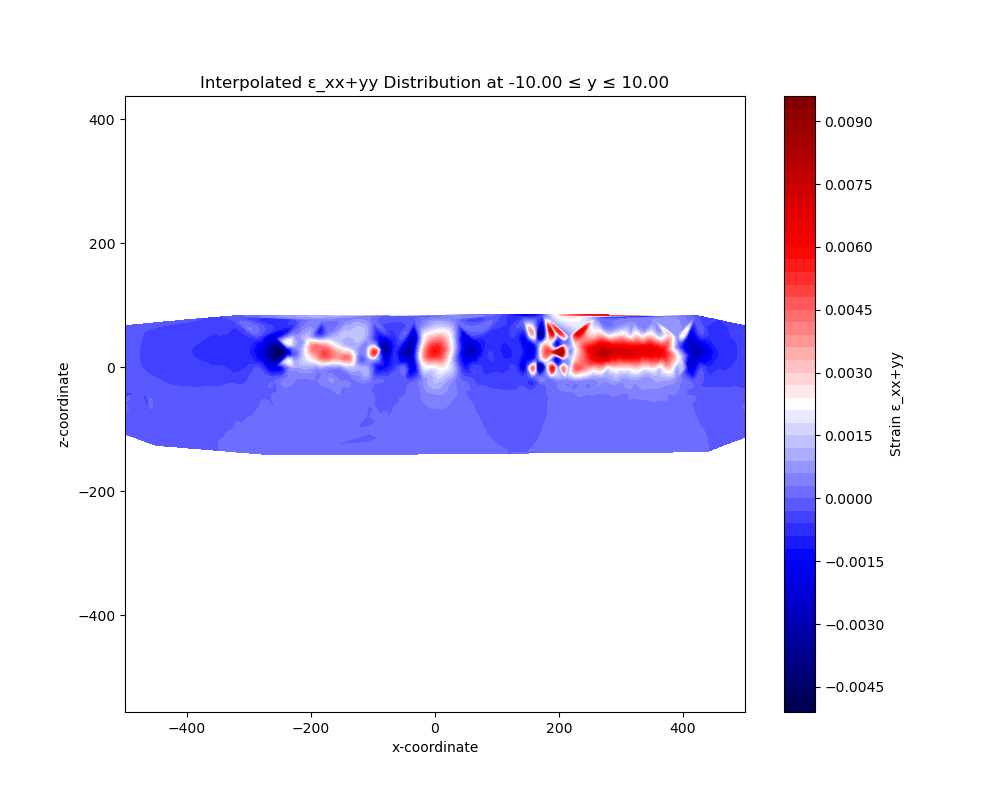

In [28]:
# Create a scalar function space for the strain component
V_scalar = fn.FunctionSpace(mesh, 'P', 1)  # 'P' for scalar field projection

# Project the yy-component of the strain tensor for visualization
strain_xx_p_yy = strain_tensor[0, 0] + strain_tensor[1, 1]
epsilon_xx_p_yy = fn.project(strain_xx_p_yy, V_scalar)  # Corrected function space

# Define the y-range for the slice
y_min, y_max = -10, 10  # Adjust these values as needed for your specific range

# Extract mesh coordinates and epsilon_xx-yy values
coords = mesh.coordinates()
epsilon_values = epsilon_xx_p_yy.compute_vertex_values(mesh)  # Already scalar values, no need for reshaping

# Filter the vertices and epsilon_values within the specified y-range
y_filter = (coords[:, 1] >= y_min) & (coords[:, 1] <= y_max)
filtered_coords = coords[y_filter]
filtered_epsilon_values = epsilon_values[y_filter]

# Create grid for interpolation on the xz-plane
x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
z_lin = np.linspace(filtered_coords[:, 2].min(), filtered_coords[:, 2].max(), 500)
X, Z = np.meshgrid(x_lin, z_lin)

# Interpolate scattered data to the grid
epsilon_component = griddata((filtered_coords[:, 0], filtered_coords[:, 2]), filtered_epsilon_values, (X, Z), method='cubic')

# Plot the interpolated ε_xx-yy values on the xz-plane
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Z, epsilon_component, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain ε_xx+yy')
plt.title(f'Interpolated ε_xx+yy Distribution at {y_min:.2f} ≤ y ≤ {y_max:.2f}')
plt.xlabel('x-coordinate')
plt.ylabel('z-coordinate')
plt.axis('equal')
plt.ylim(-134, 16)
plt.show()

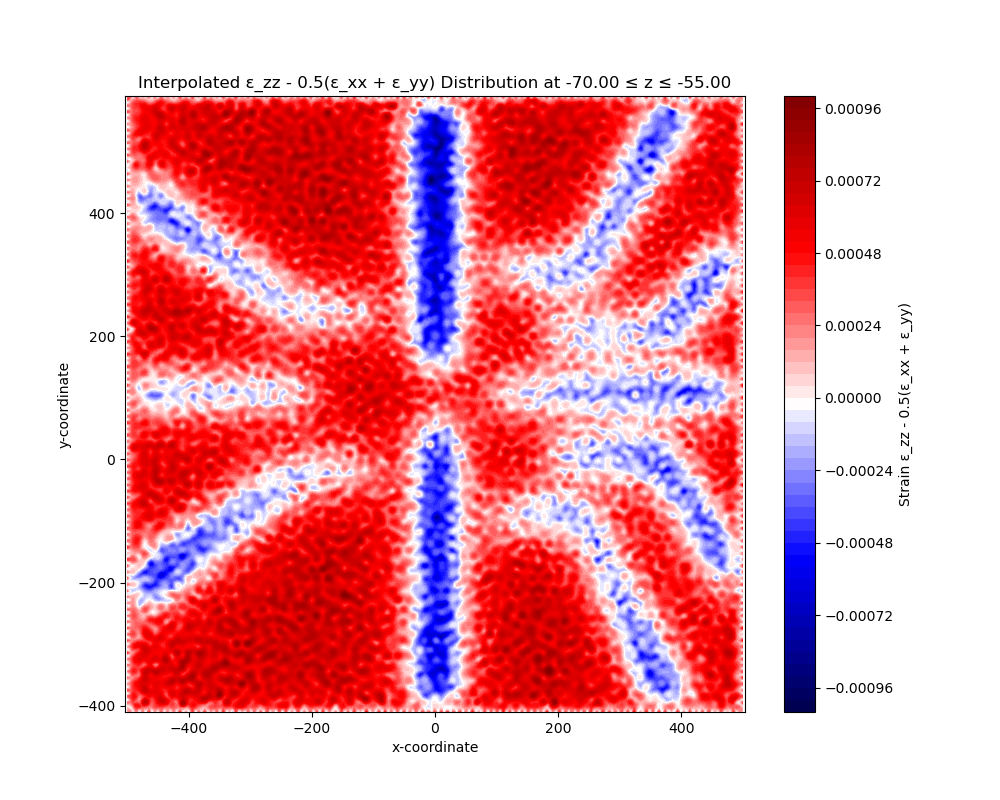

In [29]:
# Calculate the specific strain component for visualization
strain_custom = strain_tensor[2, 2] - 0.5 * (strain_tensor[0, 0] + strain_tensor[1, 1])
epsilon_custom = fn.project(strain_custom, V_scalar)  # Project the computed component

# Define the z-range for the slice
z_min, z_max = -70, -55  # Adjust these values as needed

# Extract mesh coordinates and custom epsilon values
coords = mesh.coordinates()
epsilon_values = epsilon_custom.compute_vertex_values(mesh)  # Scalar values, no reshaping needed

# Filter the vertices and epsilon_values within the specified z-range
z_filter = (coords[:, 2] >= z_min) & (coords[:, 2] <= z_max)
filtered_coords = coords[z_filter]
filtered_epsilon_values = epsilon_values[z_filter]

# Create grid for interpolation
x_lin = np.linspace(filtered_coords[:, 0].min(), filtered_coords[:, 0].max(), 500)
y_lin = np.linspace(filtered_coords[:, 1].min(), filtered_coords[:, 1].max(), 500)
X, Y = np.meshgrid(x_lin, y_lin)

# Interpolate scattered data to the grid
epsilon_component = griddata((filtered_coords[:, 0], filtered_coords[:, 1]), filtered_epsilon_values, (X, Y), method='cubic')

# Plot the interpolated strain component values
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, epsilon_component, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain ε_zz - 0.5(ε_xx + ε_yy)')
plt.title(f'Interpolated ε_zz - 0.5(ε_xx + ε_yy) Distribution at {z_min:.2f} ≤ z ≤ {z_max:.2f}')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.axis('equal')
plt.show()

# Output Data

In [27]:
V_scalar = fn.FunctionSpace(mesh, 'CG', 1)  # Scalar function space for computed values

In [28]:
# Assume 'u' is the displacement field solution from a 3D problem
strain_tensor = eps(u)  # This is a tensor field in 3D

# Calculating a component or combination of components from the tensor
strain_xx_m_yy = 0.5*(strain_tensor[0, 0] - strain_tensor[1, 1])  # Example: xx - yy component

# Define a scalar function space for storing the computed strain component
strain_xx_m_yy_func = fn.Function(V_scalar, name="Strain_XX_m_YY(3D)")

# Project the computed strain component onto the scalar function space
strain_xx_m_yy_func.assign(fn.project(strain_xx_m_yy, V_scalar))

# Create an XDMF file to output data
xdmf_file = fn.XDMFFile("strain_xx_m_yy(3D).xdmf")
xdmf_file.parameters["flush_output"] = True
xdmf_file.parameters["functions_share_mesh"] = True
xdmf_file.parameters["rewrite_function_mesh"] = False

# Write the strain component to the file, suitable for visualization in Paraview
xdmf_file.write(strain_xx_m_yy_func, 0)  # '0' might represent a time step or similar parameter

# Close the file after writing
xdmf_file.close()

print("Strain half_XX-YY component data saved to 'strain_xx_m_yy.xdmf(3D)'.")

Strain half_XX-YY component data saved to 'strain_xx_m_yy.xdmf(3D)'.


In [29]:
# Assume 'u' is the displacement field solution from a 3D problem
strain_tensor = eps(u)  # This is a tensor field in 3D

# Calculating a component or combination of components from the tensor
strain_xz = strain_tensor[0, 2]  # Example: xz component

# Define a scalar function space for storing the computed strain component
strain_xz_func = fn.Function(V_scalar, name="Strain_xz(3D)")

# Project the computed strain component onto the scalar function space
strain_xz_func.assign(fn.project(strain_xz, V_scalar))

# Create an XDMF file to output data
xdmf_file = fn.XDMFFile("strain_xz(3D).xdmf")
xdmf_file.parameters["flush_output"] = True
xdmf_file.parameters["functions_share_mesh"] = True
xdmf_file.parameters["rewrite_function_mesh"] = False

# Write the strain component to the file, suitable for visualization in Paraview
xdmf_file.write(strain_xz_func, 0)  # '0' might represent a time step or similar parameter

# Close the file after writing
xdmf_file.close()

print("Strain XZ component data saved to 'strain_xz.xdmf(3D)'.")

Strain XZ component data saved to 'strain_xz.xdmf(3D)'.


In [28]:
# Assume 'u' is the displacement field solution from a 3D problem
strain_tensor = eps(u)  # This is a tensor field in 3D

# Calculating the desired strain tensor component
strain_custom = strain_tensor[2, 2] - 0.5 * (strain_tensor[0, 0] + strain_tensor[1, 1])

# Define a scalar function space for storing the computed strain component
strain_custom_func = fn.Function(V_scalar, name="Strain_eps_zz_m_05eps_xx_yy(3D)")

# Project the computed strain component onto the scalar function space
strain_custom_func.assign(fn.project(strain_custom, V_scalar))

# Create an XDMF file to output data with a descriptive name
xdmf_file = fn.XDMFFile("strain_eps_zz_minus_half_eps_xx_plus_yy(3D).xdmf")
xdmf_file.parameters["flush_output"] = True
xdmf_file.parameters["functions_share_mesh"] = True
xdmf_file.parameters["rewrite_function_mesh"] = False

# Write the strain component to the file, suitable for visualization in Paraview
xdmf_file.write(strain_custom_func, 0)  # '0' might represent a time step or similar parameter

# Close the file after writing
xdmf_file.close()

print("Strain component ε_zz - 0.5(ε_xx + ε_yy) data saved to 'strain_eps_zz_minus_half_eps_xx_plus_yy(3D).xdmf'.")


Strain component ε_zz - 0.5(ε_xx + ε_yy) data saved to 'strain_eps_zz_minus_half_eps_xx_plus_yy(3D).xdmf'.


# Extract Numerical Values

In [26]:
# Assume 'u' is already defined and is your solution
strain_tensor = eps(u)  # eps is as defined before

# Component of interest, for example eps_yy-xx
strain_component = strain_tensor[1, 1]-strain_tensor[0, 0]

# Project this component onto the function space
strain_projected = fn.project(strain_component, V_scalar)

In [27]:
# Define the z-coordinate of the plane
z_coord = -60  # Adjust to your needs

# Create grid of points in the xy-plane at z_coord
x_values = np.linspace(-500, 500, num=1000)  # Adjust the range based on your domain
y_values = np.linspace(-410, 590, num=1000)
X, Y = np.meshgrid(x_values, y_values)
num_x, num_y = X.shape

# Prepare to store the results
strain_values = np.zeros((num_x, num_y))

for i in range(num_x):
    for j in range(num_y):
        point = fn.Point(X[i, j], Y[i, j], z_coord)
        try:
            strain_values[i, j] = strain_projected(point)
        except Exception as e:
            strain_values[i, j] = np.nan  # Handle points outside the domain or other errors

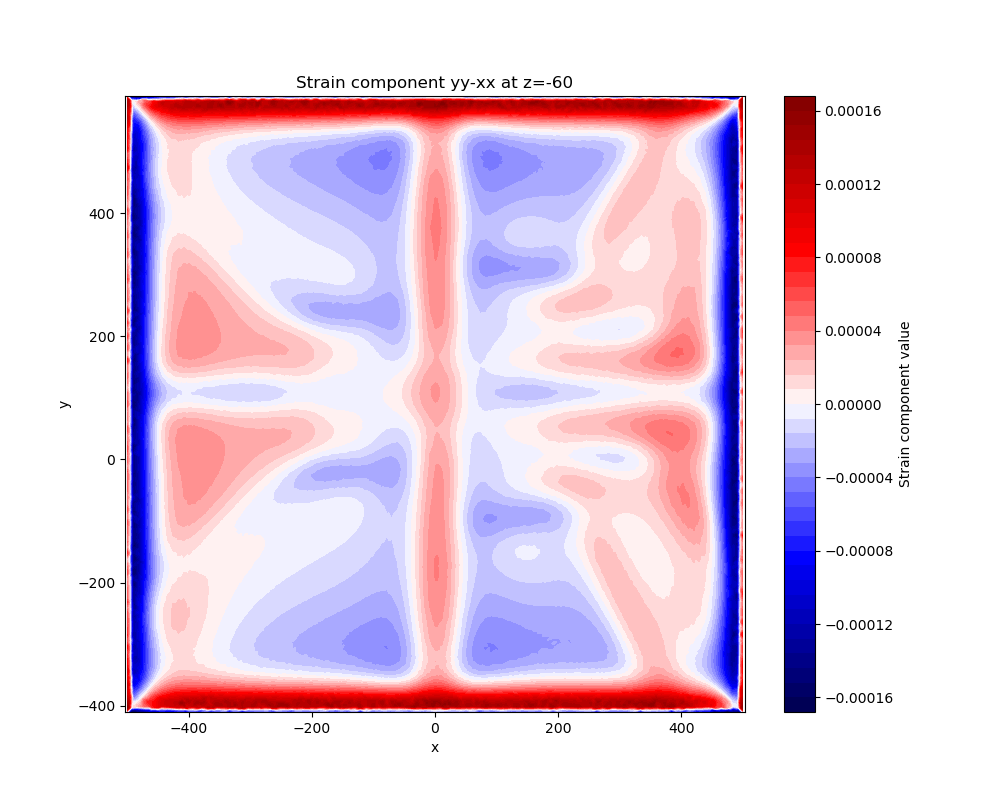

In [28]:
# Plot to verify that we got the correct value
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, strain_values, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain component value')
plt.title(f'Strain component yy-xx at z={z_coord}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [29]:
# Create a DataFrame containning coordinate data and the corresponding strain component value
df = pd.DataFrame({
    'x': X.flatten(),
    'y': Y.flatten(),
    'strain_value': strain_values.flatten()
})

# Save to a CSV file
df.to_csv("strain_yy-xx data.csv", index=False)

In [30]:
# Assume 'u' is already defined and is your solution
strain_tensor = eps(u)  # eps is as defined before

# Component of interest, for example eps_xz
strain_component = strain_tensor[0, 2]

# Project this component onto the function space
strain_projected = fn.project(strain_component, V_scalar)

In [31]:
# Define the z-coordinate of the plane
z_coord = -60  # Adjust to your needs

# Create grid of points in the xy-plane at z_coord
x_values = np.linspace(-500, 500, num=1000)  # Adjust the range based on your domain
y_values = np.linspace(-410, 590, num=1000)
X, Y = np.meshgrid(x_values, y_values)
num_x, num_y = X.shape

# Prepare to store the results
strain_values = np.zeros((num_x, num_y))

for i in range(num_x):
    for j in range(num_y):
        point = fn.Point(X[i, j], Y[i, j], z_coord)
        try:
            strain_values[i, j] = strain_projected(point)
        except Exception as e:
            strain_values[i, j] = np.nan  # Handle points outside the domain or other errors

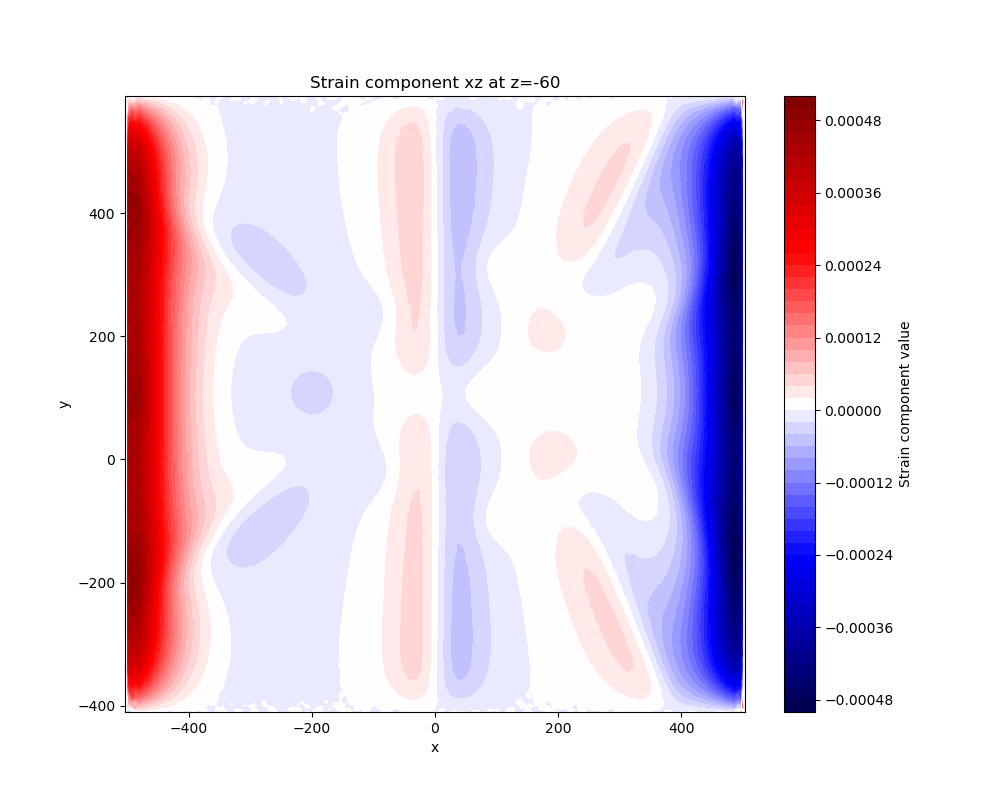

In [32]:
# Plot to verify that we got the correct value
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, strain_values, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain component value')
plt.title(f'Strain component xz at z={z_coord}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [33]:
# Create a DataFrame containning coordinate data and the corresponding strain component value
df = pd.DataFrame({
    'x': X.flatten(),
    'y': Y.flatten(),
    'strain_value': strain_values.flatten()
})

# Save to a CSV file
df.to_csv("strain_xz data.csv", index=False)

In [34]:
# Assume 'u' is already defined and is your solution
strain_tensor = eps(u)  # eps is as defined before

# Component of interest, for example eps_yz
strain_component = strain_tensor[1, 2]

# Project this component onto the function space
strain_projected = fn.project(strain_component, V_scalar)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [35]:
# Define the z-coordinate of the plane
z_coord = -60  # Adjust to your needs

# Create grid of points in the xy-plane at z_coord
x_values = np.linspace(-500, 500, num=1000)  # Adjust the range based on your domain
y_values = np.linspace(-410, 590, num=1000)
X, Y = np.meshgrid(x_values, y_values)
num_x, num_y = X.shape

# Prepare to store the results
strain_values = np.zeros((num_x, num_y))

for i in range(num_x):
    for j in range(num_y):
        point = fn.Point(X[i, j], Y[i, j], z_coord)
        try:
            strain_values[i, j] = strain_projected(point)
        except Exception as e:
            strain_values[i, j] = np.nan  # Handle points outside the domain or other errors

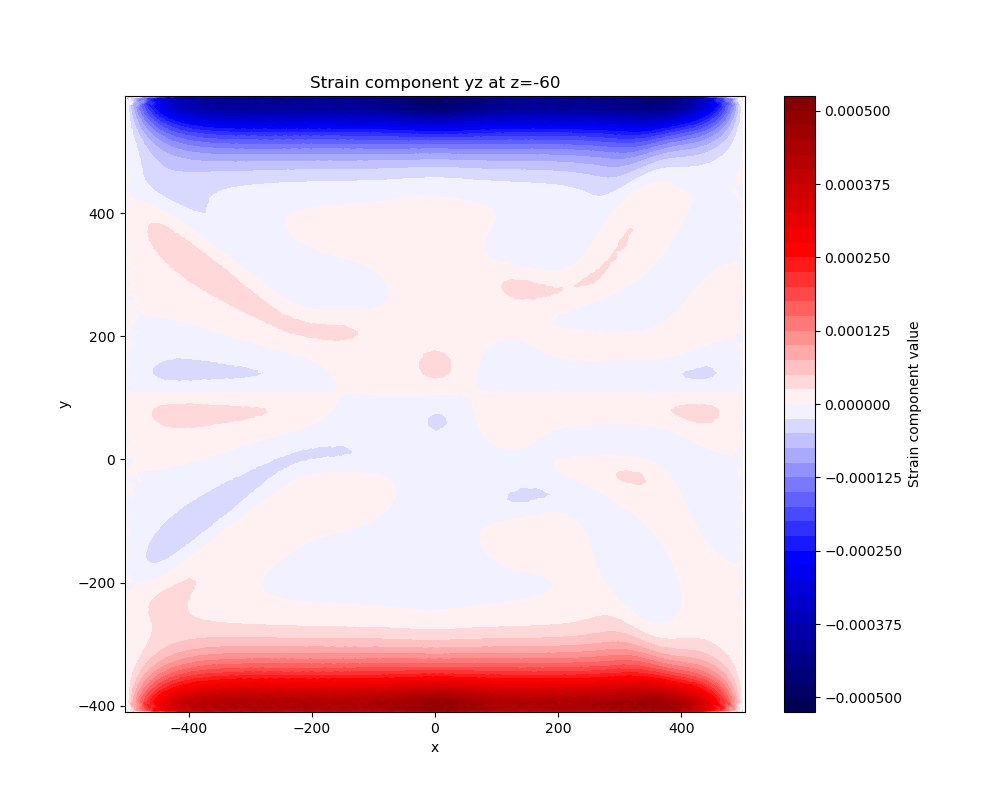

In [36]:
# Plot to verify that we got the correct value
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, strain_values, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain component value')
plt.title(f'Strain component yz at z={z_coord}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [37]:
# Create a DataFrame containning coordinate data and the corresponding strain component value
df = pd.DataFrame({
    'x': X.flatten(),
    'y': Y.flatten(),
    'strain_value': strain_values.flatten()
})

# Save to a CSV file
df.to_csv("strain_yz data.csv", index=False)

In [38]:
# Assume 'u' is already defined and is your solution
strain_tensor = eps(u)  # eps is as defined before

# Component of interest, for example eps_xy
strain_component = strain_tensor[0, 1]

# Project this component onto the function space
strain_projected = fn.project(strain_component, V_scalar)

In [39]:
# Define the z-coordinate of the plane
z_coord = -60  # Adjust to your needs

# Create grid of points in the xy-plane at z_coord
x_values = np.linspace(-500, 500, num=1000)  # Adjust the range based on your domain
y_values = np.linspace(-410, 590, num=1000)
X, Y = np.meshgrid(x_values, y_values)
num_x, num_y = X.shape

# Prepare to store the results
strain_values = np.zeros((num_x, num_y))

for i in range(num_x):
    for j in range(num_y):
        point = fn.Point(X[i, j], Y[i, j], z_coord)
        try:
            strain_values[i, j] = strain_projected(point)
        except Exception as e:
            strain_values[i, j] = np.nan  # Handle points outside the domain or other errors

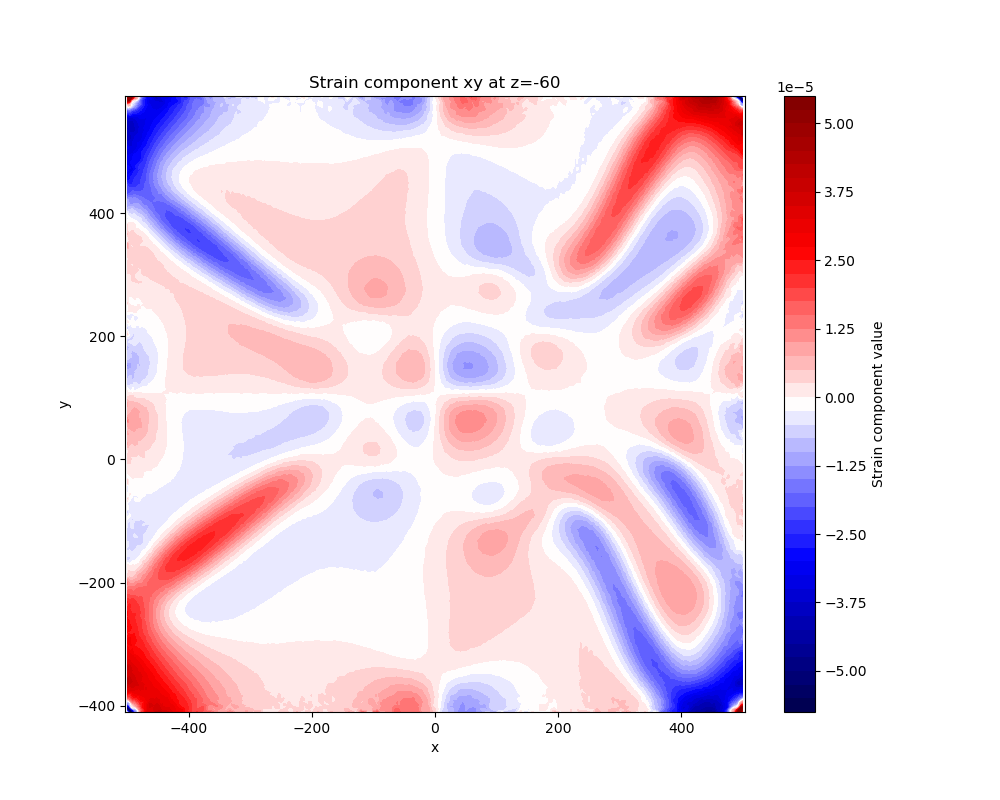

In [40]:
# Plot to verify that we got the correct value
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, strain_values, levels=50, cmap='seismic')
plt.colorbar(contour, label='Strain component value')
plt.title(f'Strain component xy at z={z_coord}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [41]:
# Create a DataFrame containning coordinate data and the corresponding strain component value
df = pd.DataFrame({
    'x': X.flatten(),
    'y': Y.flatten(),
    'strain_value': strain_values.flatten()
})

# Save to a CSV file
df.to_csv("strain_xy data.csv", index=False)

# Extract Displacement Solution

In [30]:
# Define the z-coordinate of the plane
z_coord = -60  # Adjust to your needs

# Create grid of points in the xy-plane at z_coord
x_values = np.linspace(-500, 500, num=1000)  # Adjust the range based on your domain
y_values = np.linspace(-410, 590, num=1000)
X, Y = np.meshgrid(x_values, y_values)
num_x, num_y = X.shape

In [31]:
# Assuming 'u' is your displacement vector function and mesh is defined
V = u.function_space()

# Define a scalar function space using the same mesh and degree
V_scalar = fn.FunctionSpace(mesh, 'P', 1)

# Extract x-component of the displacement
u_x = u.sub(0)

# Project this component onto the scalar function space
u_x_projected = fn.project(u_x, V_scalar)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [33]:
u_x_values = np.zeros((1000, 1000))  # Initialize an array to hold the values

for i in range(1000):
    for j in range(1000):
        point = fn.Point(X[i, j], Y[i, j], z_coord)
        u_x_values[i, j] = u_x_projected(point)


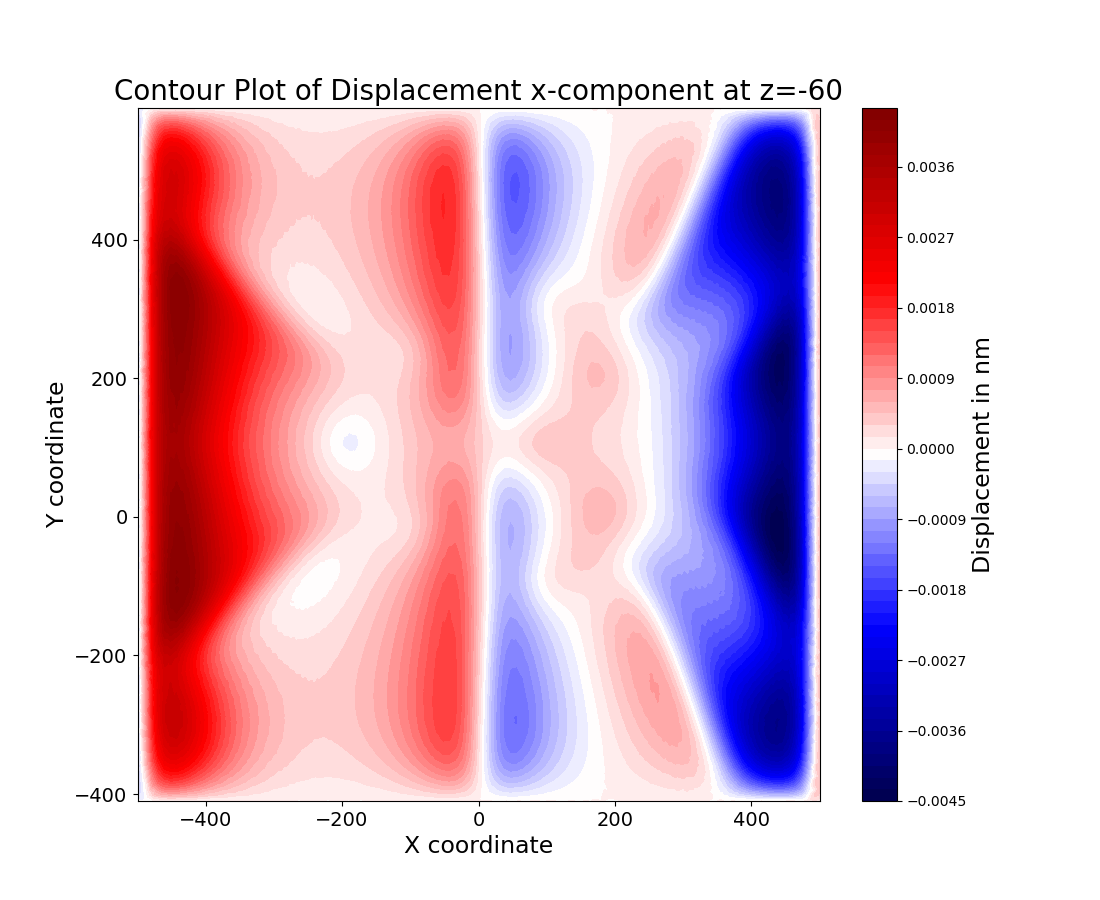

In [45]:
## Plotting the contour map of the displacement
plt.figure(figsize=(11, 9))
contour_plot = plt.contourf(X, Y, u_x_values, levels=80, cmap='seismic')
cbar = plt.colorbar(contour_plot, label='Displacement in nm')
cbar.ax.set_ylabel('Displacement in nm', fontsize=17)  # Larger font size for colorbar label

# Enhance text sizes
plt.title('Contour Plot of Displacement x-component at z=-60', fontsize=20)
plt.xlabel('X coordinate', fontsize=17)
plt.ylabel('Y coordinate', fontsize=17)
plt.xticks(fontsize=14)  # Larger font size for x-axis ticks
plt.yticks(fontsize=14)  # Larger font size for y-axis ticks
plt.show()